In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from funciones import *

# Statistics plot

In [25]:
data1 =np.load("K=10^8, n=1, mu=10^-4.npy")
data2 =np.load('K=10^8, n=1, mu=10^2.npy')

In [26]:
K = 10**8
n = 1
mu = 10**-4

delta1 = np.log(K)/(mu+np.sqrt(2*K*mu))
deltas = [delta1*0.01, delta1, delta1**(5/2), delta1*10**3]
labels = ['$\Delta=10^{-2}\Delta_1^*$','$\Delta=\Delta_1^*$','$\Delta=10^{5/2}\Delta_1^*$', '$\Delta=10^3\Delta_1^*$']

mu2 = 10**2

delta2 = np.log(K)/(mu2+np.sqrt(2*K*mu2))
deltas2 = [delta2/2, delta2, delta2*2, delta2*5]
labels2 = ['$\Delta=\Delta^*/2$','$\Delta=\Delta^*$','$\Delta=2\Delta^*$', '$\Delta=5\Delta^*$']

S ans T plot for Delta = $\Delta=10^{-2}\Delta_1^*$ done for mu = 1E-04


S ans T plot for Delta = $\Delta=\Delta_1^*$ done for mu = 1E-04
S ans T plot for Delta = $\Delta=10^{5/2}\Delta_1^*$ done for mu = 1E-04
S ans T plot for Delta = $\Delta=10^3\Delta_1^*$ done for mu = 1E-04
S ans T plot for Delta = $\Delta=\Delta^*/2$ done for mu = 1E+02
S ans T plot for Delta = $\Delta=\Delta^*$ done for mu = 1E+02
S ans T plot for Delta = $\Delta=2\Delta^*$ done for mu = 1E+02
S ans T plot for Delta = $\Delta=5\Delta^*$ done for mu = 1E+02


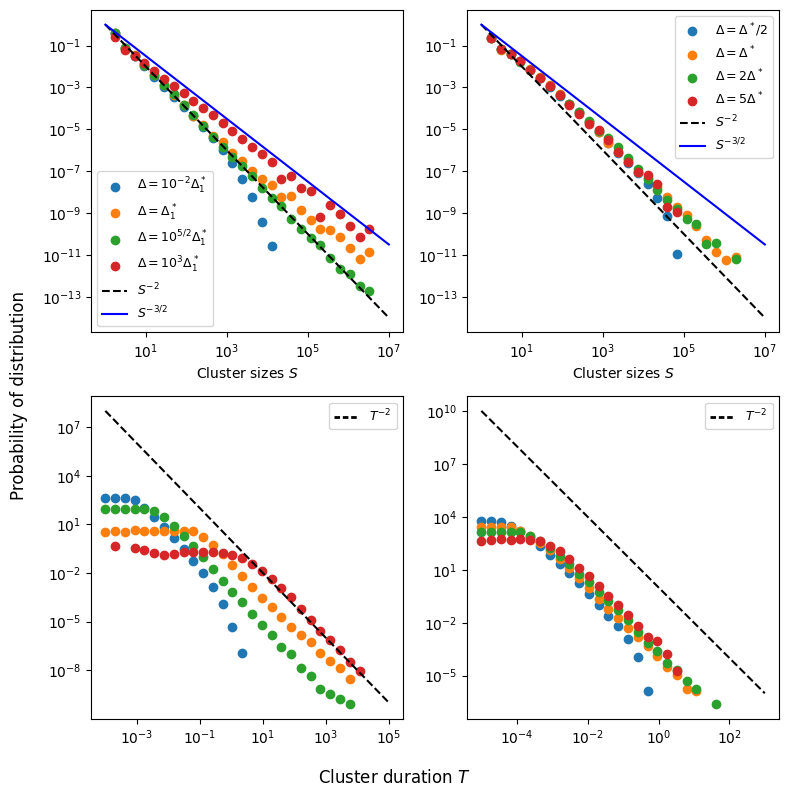

In [27]:
fig = plt.figure(figsize=(8, 8))
axgrid = fig.add_gridspec(2,2)
ax0 = fig.add_subplot(axgrid[0,0])
ax1 = fig.add_subplot(axgrid[1,0])
ax2 = fig.add_subplot(axgrid[0,1])
ax3 = fig.add_subplot(axgrid[1,1])

s_bins = np.logspace(0, 7, num = 30, base = 10)
t_bins = np.logspace(-4, 5, num = 30, base = 10)

for i in range(len(deltas)):
    clusters = identify_clusters(data1[0,:], deltas[i])
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    ax0.scatter(s_bins[:-1], s_hist[0], label=labels[i])
    
    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)
    ax1.scatter(t_bins[:-1], t_hist[0], label=labels[i])
    print(f'S ans T plot for Delta = {labels[i]} done for mu = {mu:.0E}')

y_s = s_bins**(-2)
y_t = t_bins**(-2)
y_s2 = s_bins**(-3/2)

ax0.plot(s_bins, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax1.plot(t_bins, y_t, label='$T^{-2}$', color='black', linestyle='--')
ax0.plot(s_bins, y_s2, label='$S^{-3/2}$', color='blue')

t_bins = np.logspace(-5, 3, num = 30, base = 10)

for i in range(len(deltas2)):
    clusters = identify_clusters(data2[0,:], deltas2[i])
    cluster_sizes = [len(cluster) for cluster in clusters]
    cluster_times = [cluster[-1] - cluster[0] for cluster in clusters]

    s_hist = np.histogram(cluster_sizes, bins=s_bins, density = True)
    ax2.scatter(s_bins[:-1], s_hist[0], label=labels2[i])

    t_hist = np.histogram(cluster_times, bins=t_bins, density = True)    
    ax3.scatter(t_bins[:-1], t_hist[0], label=labels2[i])

    print(f'S ans T plot for Delta = {labels2[i]} done for mu = {mu2:.0E}')
 
ax0.set_xscale('log')
ax0.set_yscale('log')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax3.set_xscale('log')
ax3.set_yscale('log')

y_t = t_bins**(-2)
ax2.plot(s_bins, y_s, label='$S^{-2}$', color='black', linestyle='--')
ax2.plot(s_bins, y_s2, label='$S^{-3/2}$', color='blue')
ax3.plot(t_bins, y_t, label='$T^{-2}$', color='black', linestyle='--')

fig.supylabel('Probability of distribution')
fig.supxlabel('Cluster duration $T$')
fig.axes[0].legend(loc = 'best', fontsize = 9)
fig.axes[2].legend(loc = 'best', fontsize = 9)

fig.axes[1].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9)
fig.axes[3].legend(handles = [Line2D([0], [0], dashes=[2, 1], color='black', linewidth=2, linestyle='--')], labels=['$T^{-2}$'], loc = 'upper right', fontsize = 9 )

fig.axes[0].set_xlabel('Cluster sizes $S$')
fig.axes[2].set_xlabel('Cluster sizes $S$')

fig.tight_layout()
fig.savefig('statistics.png')


# Percolation strength plots

In [28]:
fig = plt.figure(figsize=(12, 4))
axgrid = fig.add_gridspec(1, 3)

mus = [1, 10**-4, 10**2]
ns = [0, 1, 1]
labels = ['$K=10^4$','$K=10^5$','$K=10^6$','$K=10^7$','$K=10^8$']
deltas = [np.logspace(0, 2, num = 1000, base = 10), np.logspace(-4, 6, num = 1000, base = 10), np.logspace(-4, -1, num = 1000, base = 10)]
for i in range(3):
    n = ns[i]
    mu = mus[i]
    ax = fig.add_subplot(axgrid[0, i])
    for _ in range(5):
        K = 10**(_+4)
        print(f'Temporal series of $K={K:.0E}$ events generated')
        times_between_events, _, _ = generate_series_perc(K, n, mu)
        delta = deltas[i]
        percolation_strength = calculate_percolation_strength(times_between_events, delta)
        ax.scatter(delta, percolation_strength, s=10)
        print(f'Percolation plot for K={K:.0E}, $\mu={mu:.0E}$ done')
    ax.set_xscale('log')
    ax.set_ylim(0, 1.1)  
    ax.set_yticks([0, 0.5, 1])
    print(f'Plot {i} done')

fig.supxlabel('Resolution parameter $\Delta$', fontsize=16)
fig.axes[0].minorticks_off()
fig.axes[2].minorticks_off()
fig.axes[0].legend(labels, loc='upper left', ncol=1)
fig.supylabel('Percolation strength $P_{\infty}$', fontsize=16)
fig.tight_layout()
fig.savefig('percolation_strength.png')

Temporal series of $K=1E+04$ events generated
Percolation plot for K=1E+04, $\mu=1E+00$ done
Temporal series of $K=1E+05$ events generated
Percolation plot for K=1E+05, $\mu=1E+00$ done
Temporal series of $K=1E+06$ events generated
Percolation plot for K=1E+06, $\mu=1E+00$ done
Temporal series of $K=1E+07$ events generated
Percolation plot for K=1E+07, $\mu=1E+00$ done
Temporal series of $K=1E+08$ events generated
